In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

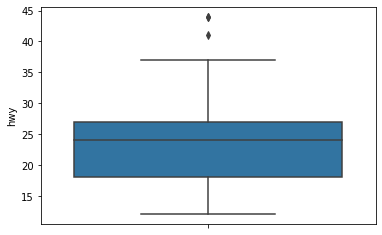

In [3]:
mpg = pd.read_csv('mpg.csv')
sns.boxplot( data = mpg , y = 'hwy')

In [4]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [5]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [6]:
iqr = pct75 - pct25
iqr

9.0

In [7]:
pct25 - 1.5 * iqr

4.5

In [8]:
pct75 + 1.5 * iqr

40.5

In [15]:
# 4.5 ~ 40.5 벗어나면 Nan 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5)| (mpg['hwy']>40.5), np.nan , mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [16]:
mpg.dropna( subset = ['hwy']) \
    .groupby('drv') \
    .agg( mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [17]:
# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [23]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [24]:
# drv가 4, f, r이면 유지, 그 외 Nan 부여
mpg['drv'] = np.where( mpg['drv'].isin(['4','f','r']), mpg['drv'], np.nan)

In [25]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

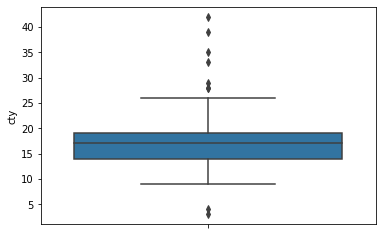

In [26]:
# 상자그림
sns.boxplot( data = mpg, y='cty')

In [27]:
pct25 = mpg['cty'].quantile(.25) #1사분위수
pct75 = mpg['cty'].quantile(.75) #3사분위수
iqr = pct75 - pct25 #IQR

In [28]:
pct25 - 1.5 * iqr

6.5

In [29]:
pct75 + 1.5 * iqr

26.5

In [30]:
mpg['cty'] = np.where( (mpg['cty'] <6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

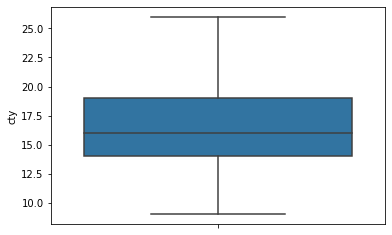

In [31]:
sns.boxplot( data = mpg, y= 'cty')

In [32]:
mpg.dropna( subset = ('drv' , 'cty')) \
    .groupby('drv') \
    .agg( mean_cty = ( 'cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
